In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe())

Shape: (768, 7)

Columns: ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None

Missing Values:
 Reg

In [8]:
df = df.rename(columns={
    "Region": "Region",
    " Date": "Date",
    " Frequency": "Frequency",
    " Estimated Unemployment Rate (%)": "Unemployment_Rate",
    " Estimated Employed": "Employed",
    " Estimated Labour Participation Rate (%)": "Labour_Participation_Rate",
    " Area": "Area"
})

df.head()


,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [9]:
df["Date"] = pd.to_datetime(df["Date"])

/tmp/ipython-input-936118274.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [10]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Unemployment_Rate,28
Employed,28
Labour_Participation_Rate,28
Area,28


/tmp/ipython-input-3978958726.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Unemployment_Rate', ci=None)


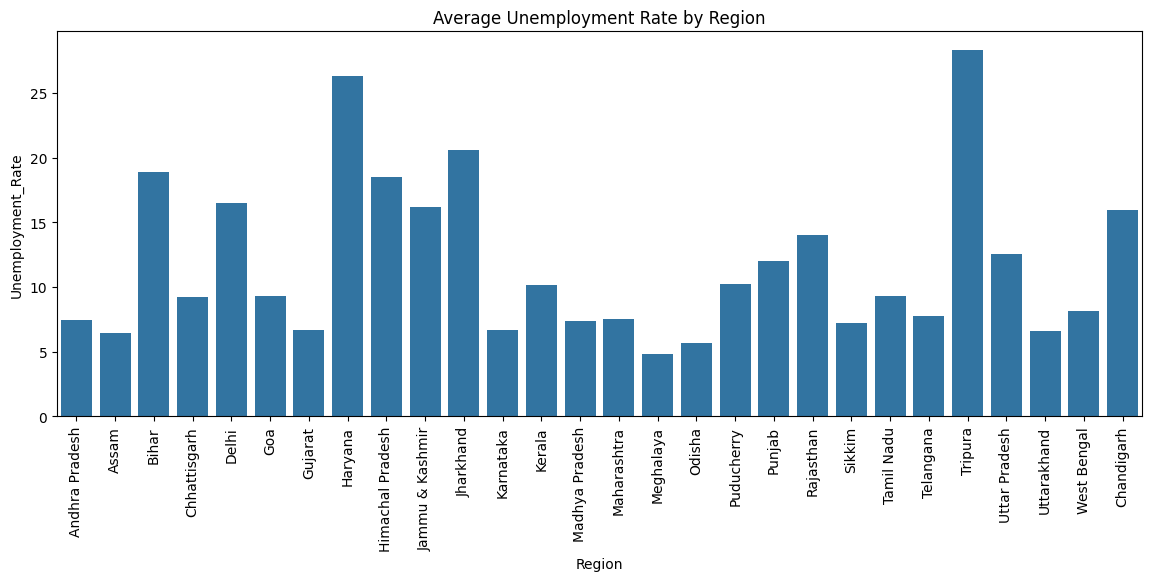

In [11]:
plt.figure(figsize=(14,5))
sns.barplot(data=df, x='Region', y='Unemployment_Rate', ci=None)
plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by Region")
plt.show()


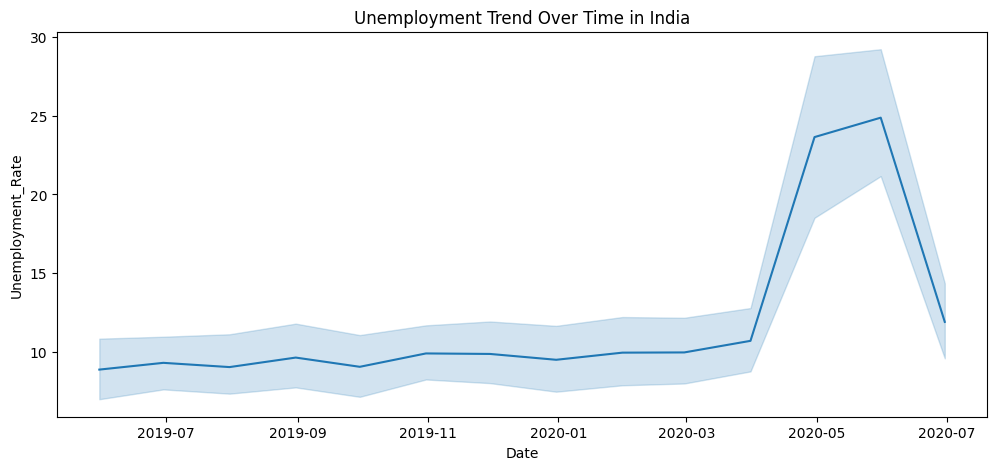

In [12]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate')
plt.title("Unemployment Trend Over Time in India")
plt.show()


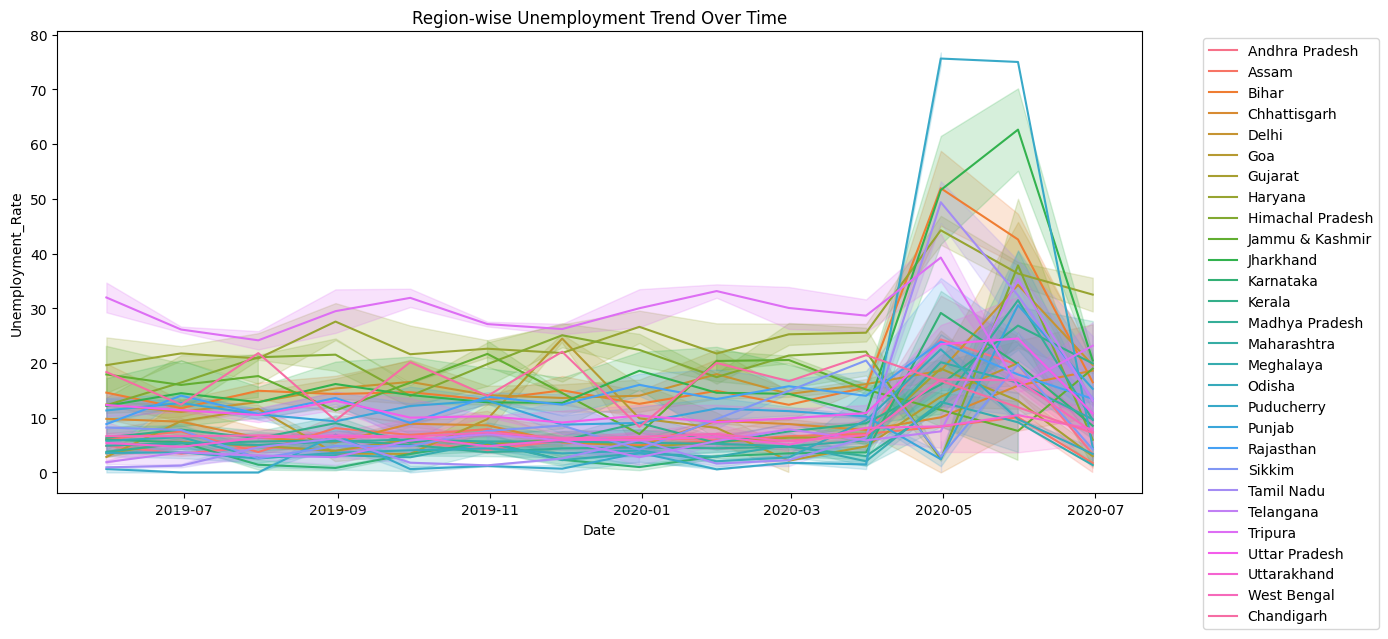

In [13]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', hue='Region')
plt.title("Region-wise Unemployment Trend Over Time")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


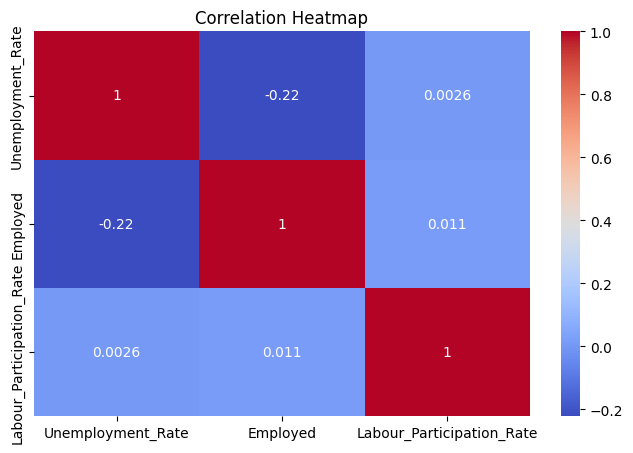

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [15]:
df.groupby("Region")["Unemployment_Rate"].mean().sort_values(ascending=False)

,Unemployment_Rate
Region,
Tripura,28.350357
Haryana,26.283214
Jharkhand,20.585000
Bihar,18.918214
Himachal Pradesh,18.540357
Delhi,16.495357
Jammu & Kashmir,16.188571
Chandigarh,15.991667
Rajasthan,14.058214


In [16]:
df.sort_values(by="Unemployment_Rate", ascending=False).head(10)

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area
627,Puducherry,2020-04-30,Monthly,76.74,68122.0,35.54,Urban
628,Puducherry,2020-05-31,Monthly,75.00,64538.0,31.25,Urban
242,Puducherry,2020-04-30,Monthly,74.51,49420.0,46.79,Rural
531,Jharkhand,2020-05-31,Monthly,70.17,830347.0,40.49,Urban
530,Jharkhand,2020-04-30,Monthly,61.48,1054829.0,39.92,Urban
412,Bihar,2020-04-30,Monthly,58.77,1400962.0,34.94,Urban
145,Jharkhand,2020-05-31,Monthly,55.10,3315038.0,37.03,Rural
287,Tamil Nadu,2020-04-30,Monthly,53.19,5086200.0,33.05,Rural
507,Himachal Pradesh,2020-05-31,Monthly,50.00,134868.0,43.55,Urban
38,Bihar,2020-05-31,Monthly,47.26,14050319.0,38.50,Rural


### ✔️ Insights from the Analysis

- Unemployment rate increased sharply during the COVID-19 period.
- Several regions such as **Rajasthan**, **Jharkhand**, **Kashmir**, and **Bihar** show higher unemployment.
- Rural vs Urban difference is visible in several states.
- Labour Participation Rate and Employment count are strongly correlated.


### 📝 Conclusion

This project helped me understand how unemployment changed during COVID-19 across Indian states and regions.
Using Python, Pandas, Matplotlib, and Seaborn, I performed:

- Data Cleaning  
- Visualization  
- Trend Analysis  
- Correlation Study  
- Regional Comparisons  

This analysis gives a clear picture of unemployment patterns in India.
